<a href="https://colab.research.google.com/github/ChubVV/mathpracticum-/blob/hometask5/Hometask5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

TASK 1. Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.

unsorted time: 0.0002484321594238281 seconds


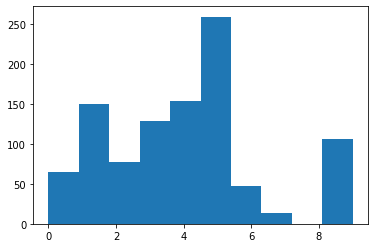

In [3]:
def get_rand(arr, n):
    r = np.random.rand(n)
    return np.searchsorted(arr, r)


arr = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
arr /= arr.sum()
arr = arr.cumsum()
start = time.time()
randomiccielli = get_rand(arr, 1000)
finish = time.time()
plt.hist(randomiccielli)
print("unsorted time: %s seconds" % (finish - start))

In [4]:
def get_rand(arr, n):
    r = np.random.rand(n)
    return np.searchsorted(arr, r)


arr = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
arr_sorted = np.sort(arr)
arr_sorted /= arr_sorted.sum()
arr_sorted = np.cumsum(arr_sorted)
start = time.time()
randomiccielli = np.argsort(arr)[get_rand(arr_sorted, 1000)]
finish = time.time()
print("sorted time: %s seconds" % (finish - start))
print("Время уменьшилось")

sorted time: 0.0002300739288330078 seconds
Время уменьшилось


TASK 2. Смоделируйте выборку размера 1000 из распределения 𝐸𝑥𝑝(𝜆) . Постройте выборочную гистограмму и точный график плотности распределения.

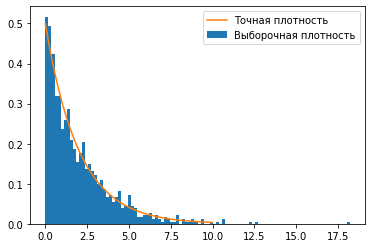

In [5]:
l = 0.5
c = np.random.random(1000)
c = -np.log(1-c)/l
a = np.arange(1000)/100
plt.hist(c,bins=100, density=True, label='Выборочная плотность')
plt.plot(a,l*np.exp(-l*a), label='Точная плотность')
plt.legend()
plt.show()

TASK 3. Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

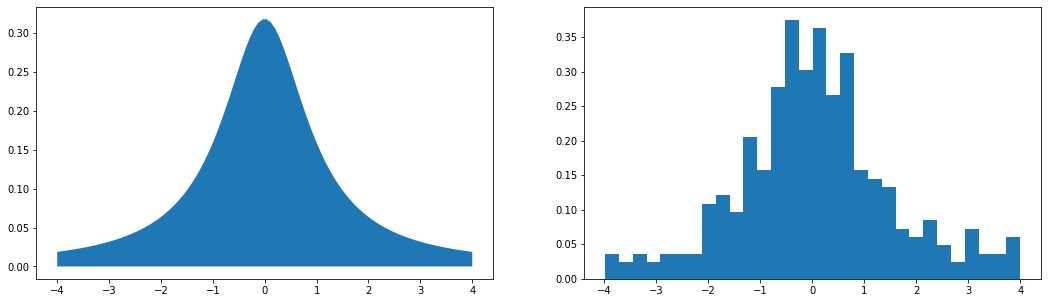

In [6]:
from scipy import stats
import numpy as np
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
sample = np.array([8 * np.random.rand(1000) - 4])
check = np.random.rand(1000) / 3
cauchy = sample[(lambda x: 1 / ((x ** 2 + 1) * np.pi)) (sample) >= check]

fig, ax = plt.subplots(1, 2, figsize = (18, 5))
ax[0].fill_between(x, 0, dist.pdf(x))
ax[1].hist(cauchy, density = True, bins = 30)
plt.show()

TASK 4. Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.

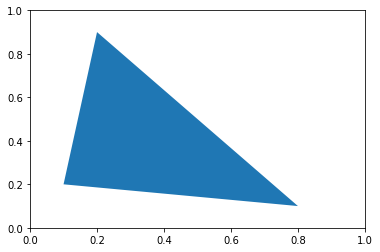

In [7]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()

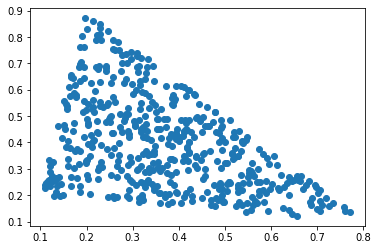

In [8]:
import math
def hypothesis(h):
    return math.sqrt(h[0] ** 2 + h[1] ** 2)

def get_rand(A, B, C, n):
    x = np.random.rand(n)
    y = np.random.rand(n)
    t = y > 1 - x
    y[t], x[t] = 1 - y[t], 1 - x[t]
    res_x = x
    res_y = y
    x *= hypothesis(B - A)
    y *= hypothesis(C - A)
    phi = math.acos((C - A)[0] / hypothesis(C - A)) - math.pi / 2
    
    res_x = x * math.cos(phi) - y * math.sin(phi) + A[0]
    res_y = x * math.sin(phi) + y * math.cos(phi) + A[1]
    return [res_x, res_y]

A = 0.1 * np.array([1, 2])
B = 0.1 * np.array([8, 1])
C = 0.1 * np.array([2, 9])
rn = get_rand(A, B, C, 500)
plt.scatter(rn[0], rn[1])

TASK 5. Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

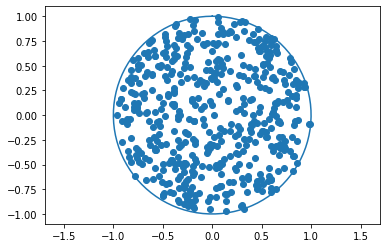

In [9]:
rand_square = np.random.rand(500, 2)

rand_square[:, 1] = rand_square[:, 1] * 2 * np.pi

rand_circle = np.array(rand_square)
rand_circle[:, 0] = np.sqrt(rand_square[:, 0]) * np.cos(rand_square[:, 1])
rand_circle[:, 1] = np.sqrt(rand_square[:, 0]) * np.sin(rand_square[:, 1])

from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.scatter(rand_circle[:, 0], rand_circle[:, 1])
plt.axis('equal')
plt.show()

TASK 6. Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

[[ 0  0]
 [ 0  1]
 [ 0  2]
 [ 1  2]
 [ 1  1]
 [ 0  1]
 [ 1  1]
 [ 2  1]
 [ 3  1]
 [ 3  2]
 [ 3  1]
 [ 3  2]
 [ 2  2]
 [ 2  3]
 [ 1  3]
 [ 1  2]
 [ 0  2]
 [ 0  3]
 [ 0  2]
 [ 1  2]
 [ 0  2]
 [ 0  3]
 [-1  3]
 [-2  3]
 [-3  3]
 [-3  2]
 [-2  2]
 [-2  3]
 [-2  2]
 [-3  2]
 [-2  2]
 [-3  2]
 [-3  1]
 [-3  0]
 [-4  0]
 [-4 -1]
 [-4  0]
 [-3  0]
 [-3  1]
 [-4  1]
 [-4  0]
 [-4  1]
 [-4  2]
 [-4  1]
 [-4  0]
 [-4  1]
 [-4  0]
 [-4 -1]
 [-4 -2]
 [-5 -2]
 [-4 -2]
 [-4 -3]
 [-3 -3]
 [-2 -3]
 [-2 -4]
 [-1 -4]
 [ 0 -4]
 [ 0 -3]
 [ 0 -4]
 [ 0 -3]
 [ 1 -3]
 [ 1 -4]
 [ 0 -4]
 [-1 -4]
 [-2 -4]
 [-2 -5]
 [-2 -6]
 [-3 -6]
 [-3 -5]
 [-3 -6]
 [-3 -5]
 [-2 -5]
 [-1 -5]
 [-2 -5]
 [-3 -5]
 [-4 -5]
 [-4 -4]
 [-4 -3]
 [-4 -2]
 [-3 -2]
 [-3 -1]
 [-4 -1]
 [-4  0]
 [-3  0]
 [-3  1]
 [-3  2]
 [-2  2]
 [-2  3]
 [-2  4]
 [-3  4]
 [-3  3]
 [-2  3]
 [-2  4]
 [-1  4]
 [-1  3]
 [-1  2]
 [-1  1]
 [-1  0]
 [ 0  0]
 [ 0  0]]


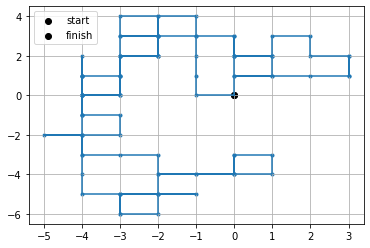

In [10]:
def dist(value):
    return np.abs(value[0]) + np.abs(value[1])

def dist_x(value):
    return np.abs(value[0])

def dist_y(value):
    return np.abs(value[1])

wandering = np.array([[0, 0]])
n = 100
for i in range(1, n):
    tmp = np.random.rand()
    if (dist(wandering[i - 1]) < n - i - 1):
        movement = ([-1, 0] if tmp < 0.25 else [1, 0] if tmp < 0.5 else [0, -1] if tmp < 0.75 else [0, 1])
    elif (dist_x(wandering[i - 1]) > 0 and dist_y(wandering[i - 1]) > 0):
        movement = ([-np.sign(wandering[i - 1][0]), 0] if tmp < 0.5 else [0, -np.sign(wandering[i - 1][1])])
    elif (dist_x(wandering[i - 1]) > 0 and dist_y(wandering[i - 1]) == 0):
        movement = [-np.sign(wandering[i - 1][0]), 0]
    else:
        movement = [0, -np.sign(wandering[i - 1][1])]
    value = wandering[i - 1] + movement
    wandering = np.vstack((wandering, value))
print(wandering)

plt.grid()
plt.plot(wandering[:, 0], wandering[:, 1])
plt.scatter(wandering[:, 0], wandering[:, 1], marker = '.')
plt.scatter(0, 0, c = 'black', marker = 'o', label = 'start')
plt.scatter(wandering[-1, 0], wandering[-1, 1], c = 'black', marker = 'o', label = 'finish')
plt.legend()
plt.show()